<a href="https://colab.research.google.com/github/thetrotfreak/MCA572/blob/cv/2347111_CV_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Order Derivative
---
- **Sobel, Prewitt, Scharr** detect edges by calculating the gradient of image intensity, focusing on the rate of intensity change between neighboring pixels.
- These methods are sensitive to noise but perform well for general edge detection, with Scharr providing better accuracy for small details.

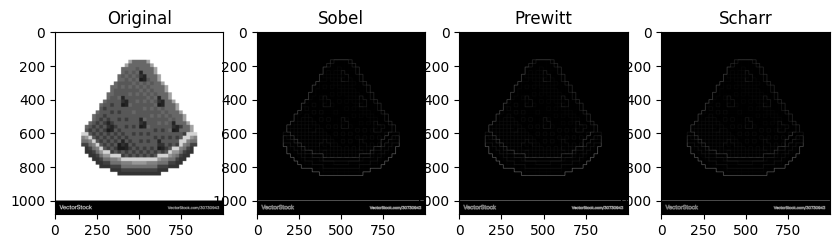

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('/content/pixel-watermelon-icon-32x32-vector-30730943.jpg', cv2.IMREAD_GRAYSCALE)

# Sobel edge detection (first-order derivative)
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x direction
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y direction
sobel_combined = cv2.magnitude(sobel_x, sobel_y)      # Combine gradients

# Prewitt edge detection (approximated by using Sobel with ksize=3)
prewitt_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
prewitt_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
prewitt_combined = cv2.magnitude(prewitt_x, prewitt_y)

# Scharr edge detection (better approximation of the derivative, uses kernel size of 3)
scharr_x = cv2.Scharr(img, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(img, cv2.CV_64F, 0, 1)
scharr_combined = cv2.magnitude(scharr_x, scharr_y)

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(141), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(142), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel')
plt.subplot(143), plt.imshow(prewitt_combined, cmap='gray'), plt.title('Prewitt')
plt.subplot(144), plt.imshow(scharr_combined, cmap='gray'), plt.title('Scharr')
plt.show()

# Second Order Derivative
---
- **Laplacian** detects edges by finding rapid intensity changes using second derivatives, often capturing finer details but amplifying noise.
- It works best when combined with smoothing filters to reduce noise while emphasizing areas of sharp intensity change.

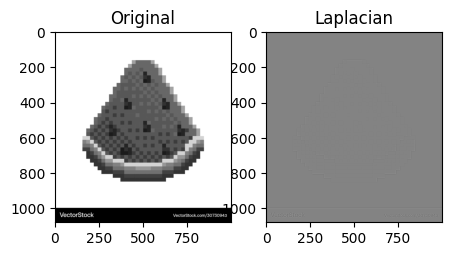

In [2]:
# Laplacian edge detection (second-order derivative)
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=3)

# Plot the result
plt.figure(figsize=(5, 5))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian')
plt.show()

# Optimum Edge Detenction using Canny
---
- Canny combines gradient detection, non-maximum suppression, and double thresholding to produce precise, noise-resistant edge detection.
- It is optimal for applications requiring both strong and weak edges with minimal noise, making it widely used in object detection and computer vision tasks.
- Thresholding:
    - In Canny edge detection, the two threshold parameters define the sensitivity of edge detection.
    - The **lower threshold** marks potential weak edges, while the **upper threshold** identifies strong edges.
    - Edges with gradient values above the upper threshold are accepted as strong edges, and weak edges are only retained if they are connected to strong edges, ensuring more reliable edge detection and reducing noise.

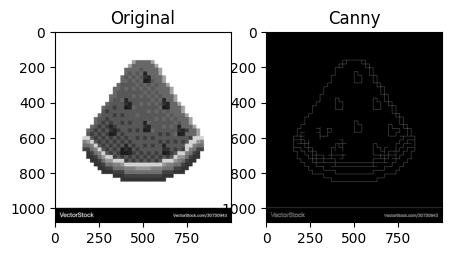

In [3]:
# Canny edge detection (optimal edge detection method)
canny_edges = cv2.Canny(img, 100, 200)

# Plot the result
plt.figure(figsize=(5, 5))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny')
plt.show()